In [8]:
import pandas as pd
from numpy import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as pl
from scipy.optimize import least_squares
from datetime import date, timedelta
import random
import math

In [9]:
# Dados começam 01/01/2022
# Vacinação começa 19/01/2022
# fillna(0) substitui todos os valores sem input por 0
Dados= pd.read_csv ('../dados_usados/Dados_novos_BAHIA.csv')
vacinados_dados = Dados['Vacinados'].fillna(0)
mortos_dados = Dados['Mortos'].fillna(0)
casos_dados = Dados['Casos acumulados']
datas = Dados["datetime"].fillna(0)

In [10]:
# Pegar todos os dados 
dfA1 = pd.read_csv('Antecipacao/mortes_resultado_muito_adiantado.csv')['0']
dfA2 = pd.read_csv('Antecipacao/mortes_resultados_adiantado.csv')['0']
dfA3 = pd.read_csv('Antecipacao/mortes_resultados_normal.csv')['0']

dfE1 = pd.read_csv('Eficacia/mortes_resultados_inteiro.csv')['0']
dfE2 = pd.read_csv('Eficacia/mortes_resultados_metade.csv')['0']
dfE3 = pd.read_csv('Eficacia/mortes_resultados_normal.csv')['0']

dfT1 = pd.read_csv('Taxa/mortes_resultados_dobro.csv')['0']
dfT2 = pd.read_csv('Taxa/mortes_resultados_metade.csv')['0']
dfT3 = pd.read_csv('Taxa/mortes_resultados_normal.csv')['0']



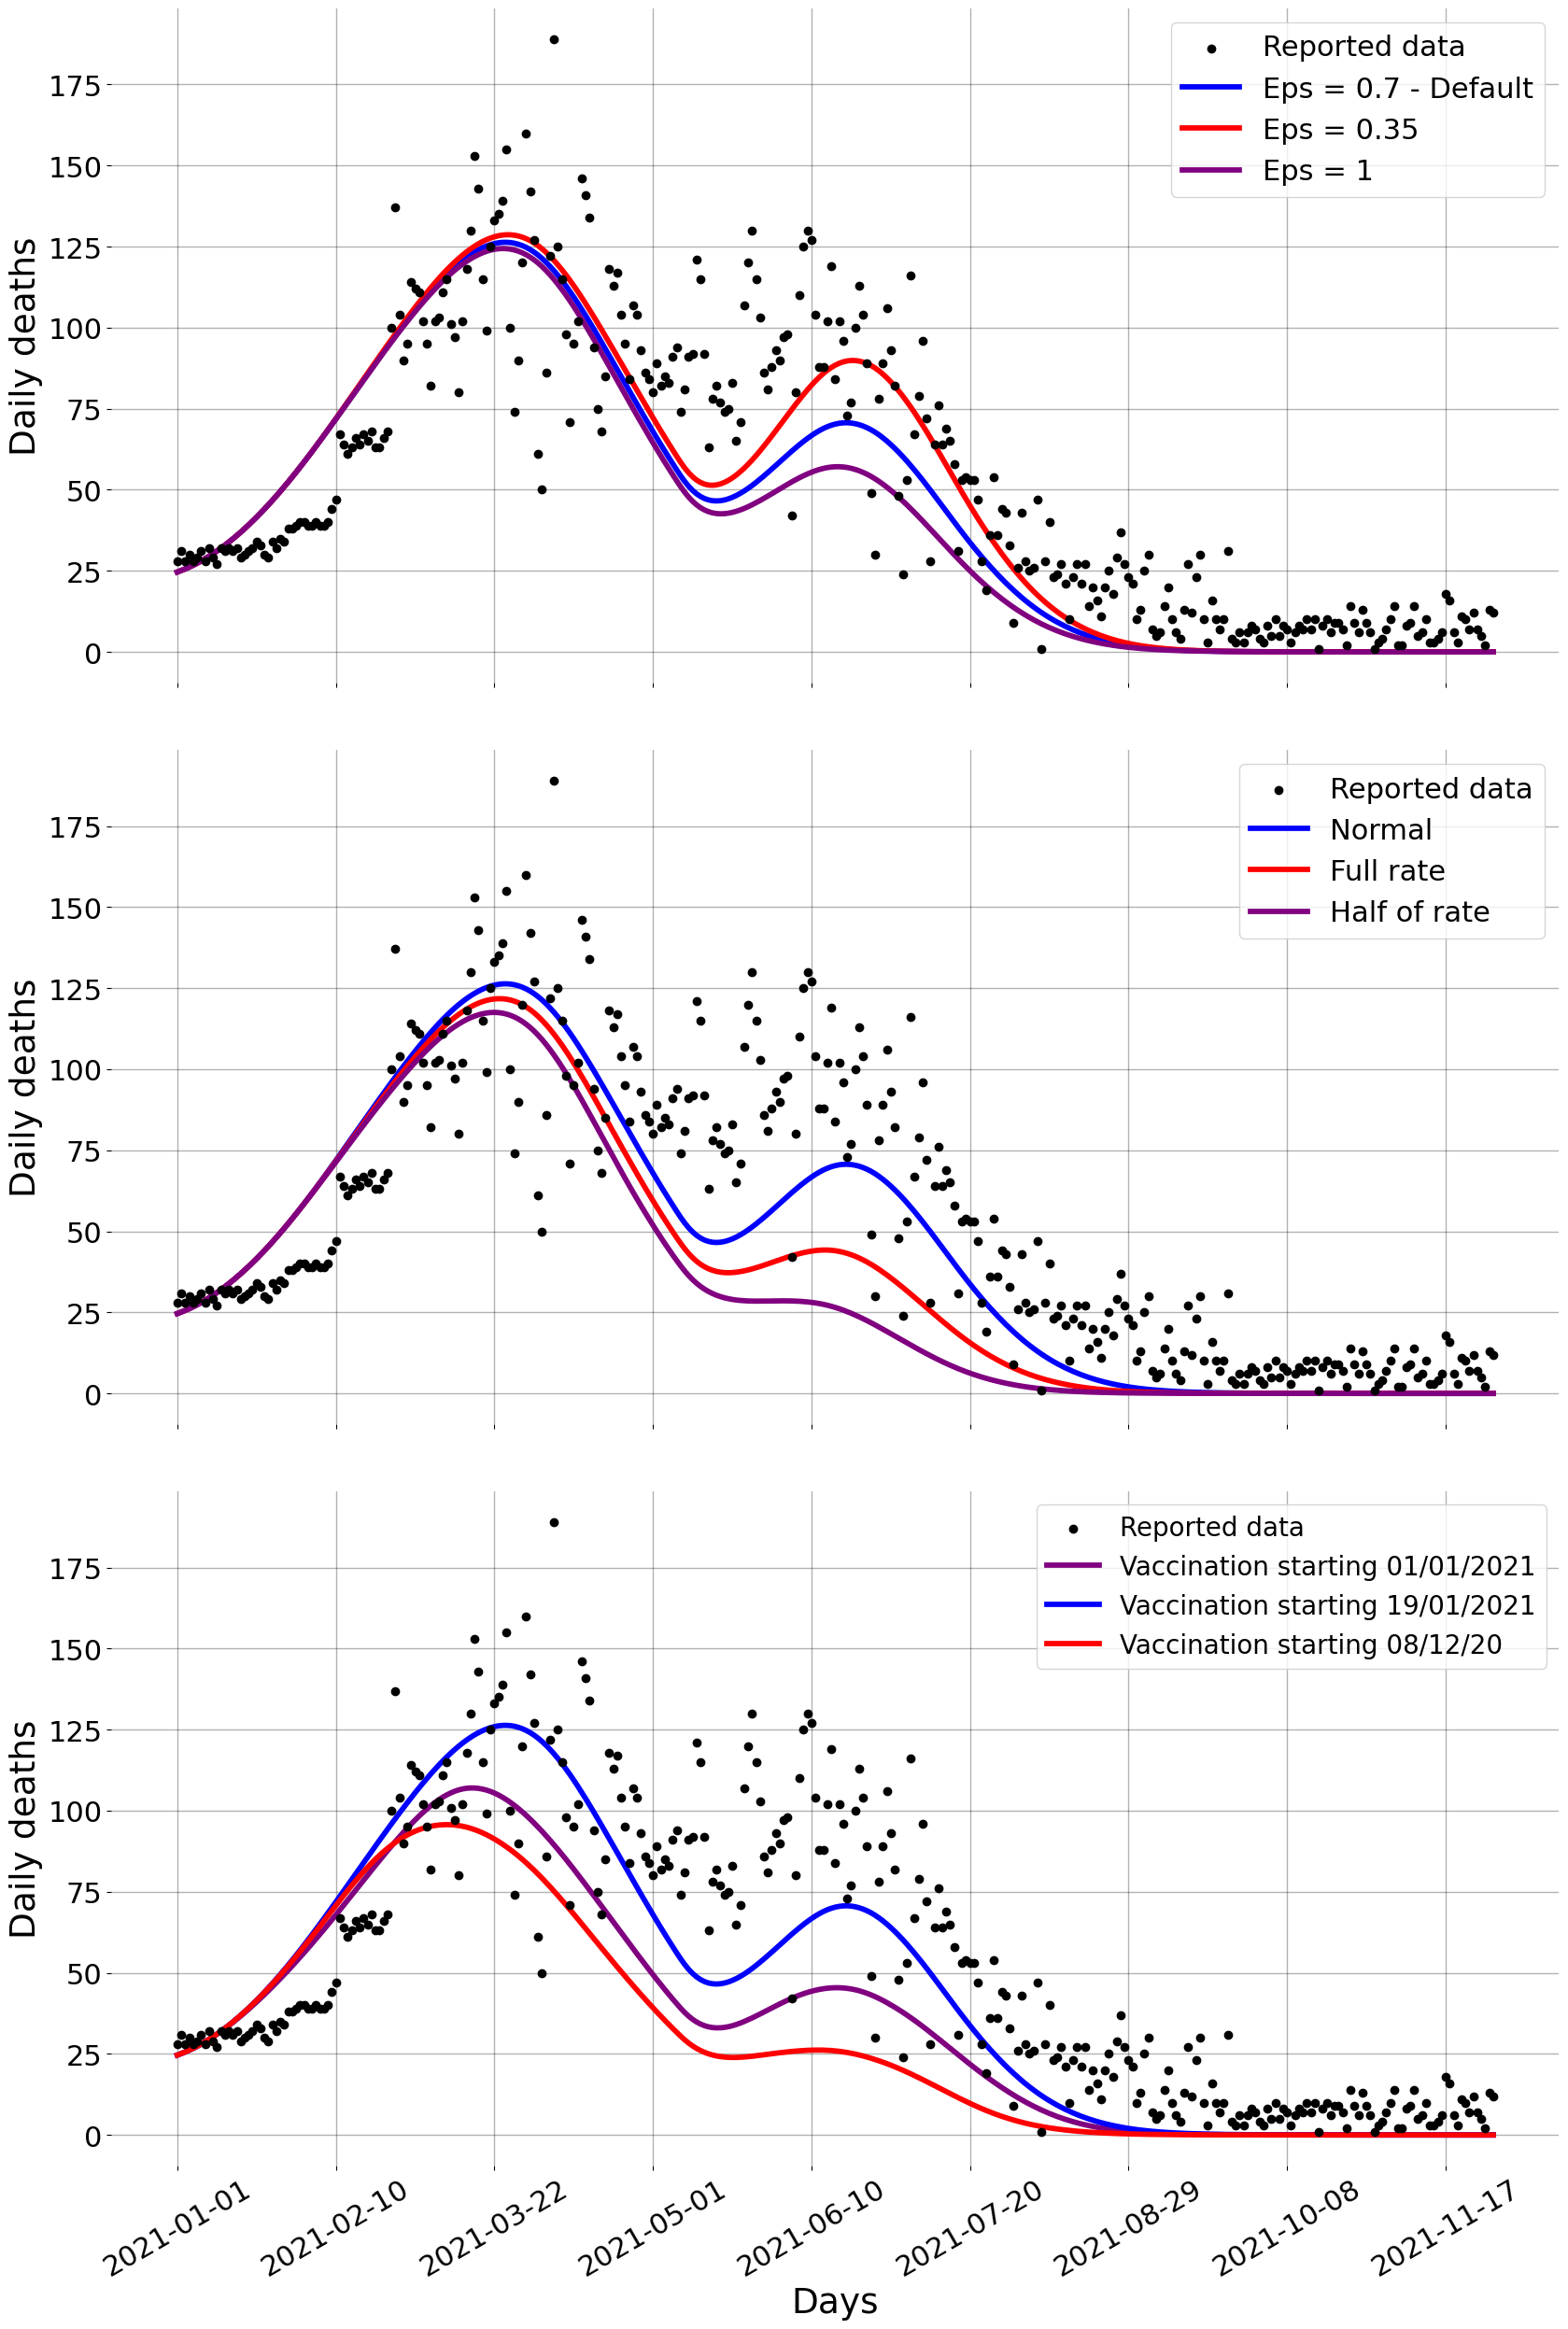

In [18]:
N = 14873064

width = np.pi+1
mortes_resultados_inteiro = dfE1 #casos acumulados
mortes_resultados_metade = dfE2 #casos acumulados
mortes_resultados_normal = dfE3 #casos acumulados

#Criando plot EFICACIA
fig, (ax1,ax2, ax3) = pl.subplots(figsize=(20, 30), nrows=3, sharex=True, subplot_kw=dict(frameon=False)) # frameon=False removes frames

#Desenhando grid no plot
ax1.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)
pl.subplots_adjust(hspace=.1)
# Taxa de casos - dados
taxa_casos_dados = np.diff(mortos_dados)
ax1.scatter(datas[:len(taxa_casos_dados)], taxa_casos_dados, color='black', zorder=3, label='Reported data')

# Taxa de casos - modelo
taxa_casos_modelo_normal = np.diff(N*mortes_resultados_normal)
#Plot the fitted function as a line.
ax1.plot(datas[:len(taxa_casos_modelo_normal)], taxa_casos_modelo_normal, color='blue',label='Eps = 0.7 - Default', linewidth=width)

# Taxa de mortos - modelo
taxa_casos_modelo_metade = np.diff(N*mortes_resultados_metade)
#Plot the fitted function as a line.
ax1.plot(datas[:len(taxa_casos_modelo_metade)], taxa_casos_modelo_metade, color='red',label='Eps = 0.35', linewidth=width)

# Taxa de mortos - modelo
taxa_casos_modelo_inteiro = np.diff(N*mortes_resultados_inteiro)
#Plot the fitted function as a line.
ax1.plot(datas[:len(taxa_casos_modelo_inteiro)], taxa_casos_modelo_inteiro, color='purple',label='Eps = 1', linewidth=width)

ax1.autoscale()
ax1.tick_params(labelsize=22)
#Set the labels
ax1.set_ylabel('Daily deaths',fontsize=27)

mortes_resultados_metade = dfT1 #mortes acumulados
mortes_resultados_dobro = dfT2 #mortes acumulados
mortes_resultados_normal = dfT3 #mortes acumulados

#Criando plot

#Desenhando grid no plot
ax2.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

# Taxa de mortos - dados
taxa_mortos_dados = np.diff(mortos_dados)
ax2.scatter(datas[:len(taxa_mortos_dados)], taxa_mortos_dados, color='black', zorder=3, label='Reported data')

# Taxa de mortos - modelo
taxa_mortos_modelo_normal = np.diff(N*mortes_resultados_normal)
#Plot the fitted function as a line.
ax2.plot(datas[:len(taxa_mortos_modelo_normal)], taxa_mortos_modelo_normal, color='blue',label='Normal', linewidth=width)

# Taxa de mortos - modelo
taxa_mortos_modelo_dobro = np.diff(N*mortes_resultados_dobro)
#Plot the fitted function as a line.
ax2.plot(datas[:len(taxa_mortos_modelo_dobro)], taxa_mortos_modelo_dobro, color='red',label='Full rate', linewidth=width)

# Taxa de mortos - modelo
taxa_mortos_modelo_adiantado = np.diff(N*mortes_resultados_metade)
#Plot the fitted function as a line.
ax2.plot(datas[:len(taxa_mortos_modelo_adiantado)], taxa_mortos_modelo_adiantado, color='purple',label='Half of rate', linewidth=width)

ax2.autoscale()

#Set the labels
ax2.set_ylabel('Daily deaths',fontsize=27)
#Set the title
#The size of the numbers on the axixis
ax2.tick_params(labelsize=22)

#Limiting the ammount of dates on the X axixs
ax2.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax2.get_xticklabels(), rotation=30)


casos_resultados_adiantados = dfA2  #mortes acumulados
casos_resultados_normais = dfA3 #mortes acumulados
casos_resultados_muito_adiantados = dfA1 #mortes acumulados

#Criando plot
#Desenhando grid no plot
ax3.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

# Taxa de mortos - dados
taxa_casos_dados = np.diff(mortos_dados)
ax3.scatter(datas[:len(taxa_casos_dados)], taxa_casos_dados, color='black', zorder=3, label='Reported data')

# Taxa de mortos - modelo
taxa_casos_adiantados = np.diff(N*casos_resultados_adiantados)
#Plot the fitted function as a line.
ax3.plot(datas[:len(taxa_casos_adiantados)], taxa_casos_adiantados, color='purple',label='Vaccination starting 01/01/2021', linewidth=width)

# Taxa de mortos - modelo
taxa_casos_modelo_normal = np.diff(N*casos_resultados_normais)
#Plot the fitted function as a line.
ax3.plot(datas[:len(taxa_casos_modelo_normal)], taxa_casos_modelo_normal, color='blue',label='Vaccination starting 19/01/2021', linewidth=width)

# Taxa de mortos - modelo
taxa_casos_modelo_muito_adiantado = np.diff(N*casos_resultados_muito_adiantados)
#Plot the fitted function as a line.
ax3.plot(datas[:len(taxa_casos_modelo_muito_adiantado)], taxa_casos_modelo_muito_adiantado, color='red',label='Vaccination starting 08/12/20', linewidth=width)


ax3.autoscale()

#Set the labels
ax3.set_ylabel('Daily deaths',fontsize=27)
ax3.set_xlabel('Days', fontsize=27)
#Set the title
#The size of the numbers on the axixis
ax3.tick_params(labelsize=22)

#Limiting the ammount of dates on the X axixs
ax3.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax3.get_xticklabels(), rotation=30)
ax1.legend(prop={'size': 22})
ax2.legend(prop={'size': 22})
ax3.legend(prop={'size': 20})
#Show Graph       
pl.show()

In [12]:
N = 14873064


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax2.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Arial")  



In [13]:
N = 14873064


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax3.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Arial")  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


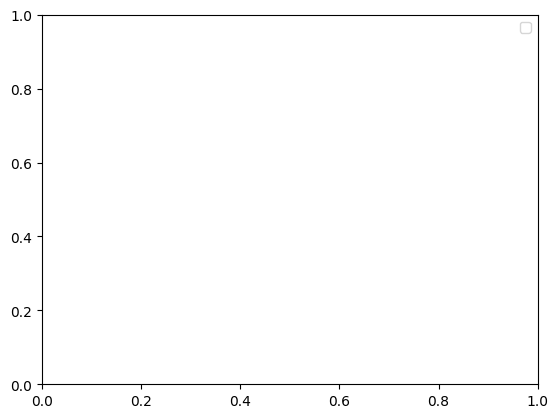

In [14]:
#Show Graph       
pl.legend()
pl.show()